In [1]:
# calibration with data collected during 2002-2003 in marrakech / Field C2

import sys, os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
data_dir = os.path.join(os.getcwd(), "C2")
import pcse
cropfile = os.path.join(data_dir, 'C2.crop')
from pcse.fileinput import CABOFileReader
cropdata = CABOFileReader(cropfile)
soilfile = os.path.join(data_dir, 'MO4.soil')
soildata = CABOFileReader(soilfile)
from pcse.util import WOFOST71SiteDataProvider
sitedata = WOFOST71SiteDataProvider(WAV=0.700, CO2=360)
from pcse.base import ParameterProvider
parameters = ParameterProvider(cropdata=cropdata, soildata=soildata, sitedata=sitedata)
from pcse.fileinput import YAMLAgroManagementReader
agromanagement_file = os.path.join(data_dir, 'C2_calendar.agro')
agromanagement = YAMLAgroManagementReader(agromanagement_file)
from pcse.fileinput import ExcelWeatherDataProvider
wdp = ExcelWeatherDataProvider('Climat_2002-2003.xlsx')
from pcse.models import Wofost71_WLP_FD
wofsim = Wofost71_WLP_FD(parameters, wdp, agromanagement)
wofsim.run_till_terminate()
df_results = pd.DataFrame(wofsim.get_output())
df_results = df_results.set_index("day")
df_results.tail()

Platform not recognized, using system temp directory for PCSE settings.
Platform not recognized, using system temp directory for PCSE settings.
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pcse/fileinput/yaml_agro_loader.py:21: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  r = yaml.load(fp)


,DVS,LAI,TAGP,TWSO,TWLV,TWST,TWRT,TRA,RD,SM,WWLOW,EVW,EVS
day,,,,,,,,,,,,,
2003-05-23,2.0,0.208953,4721.987747,1907.586323,902.741987,1911.659437,427.056072,0.015195,55.0,0.186084,24.634625,0.0,0.062253
2003-05-24,2.0,0.118600,4721.987747,1907.586323,902.741987,1911.659437,427.056072,0.007270,55.0,0.184676,24.557177,0.0,0.056889
2003-05-25,2.0,0.087621,4721.987747,1907.586323,902.741987,1911.659437,427.056072,0.004818,55.0,0.183509,24.493018,0.0,0.055076
2003-05-26,2.0,0.042436,4721.987747,1907.586323,902.741987,1911.659437,427.056072,0.002341,55.0,0.182420,24.433124,0.0,0.061191
2003-05-27,2.0,0.026609,4721.987747,1907.586323,902.741987,1911.659437,427.056072,0.001361,55.0,0.181265,24.369592,0.0,0.060226


In [70]:
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
# for var, ax in zip(["TWSO", "TAGP", "LAI", "SM"], axes.flatten()):
#     ax.plot_date(df_results.index, df_results[var], 'b-')
#     ax.set_title(var)
# fig.autofmt_xdate()

In [3]:
output = wofsim.get_output()
df = pd.DataFrame(output)
df.to_excel("wwh107_C2s.xls")

sortie_C2 = pd.read_excel('/Users/mac/LAI_TAGP_TWSO_2002_2003.xlsx' , sheet_name="C2") 
result = sortie_C2.set_index("day")
# result

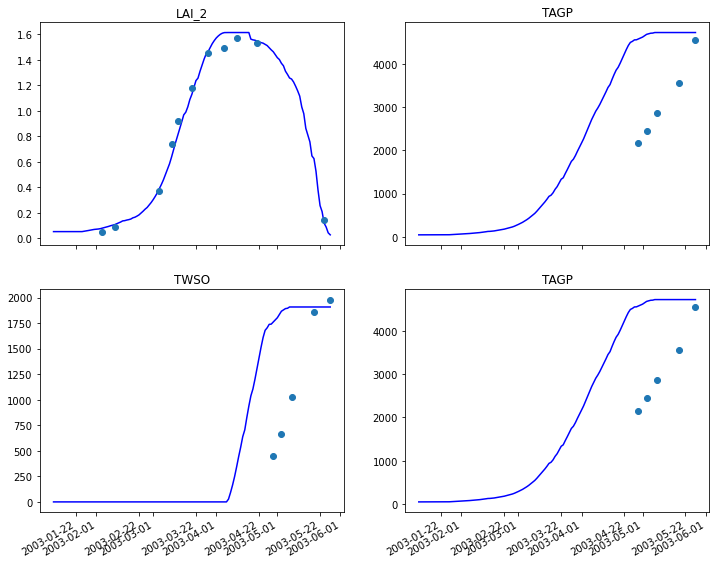

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
for var, ax in zip(["LAI", "TAGP", "TWSO", "TAGP"], axes.flatten()):
    ax.plot_date(df_results.index, df_results[var], 'b-')
    ax.set_title(var)
for var, ax in zip(["LAI_2", "TAGP", "TWSO", "TAGP"], axes.flatten()):
    ax.plot_date(result.index, result[var])
    ax.set_title(var)
fig.autofmt_xdate()

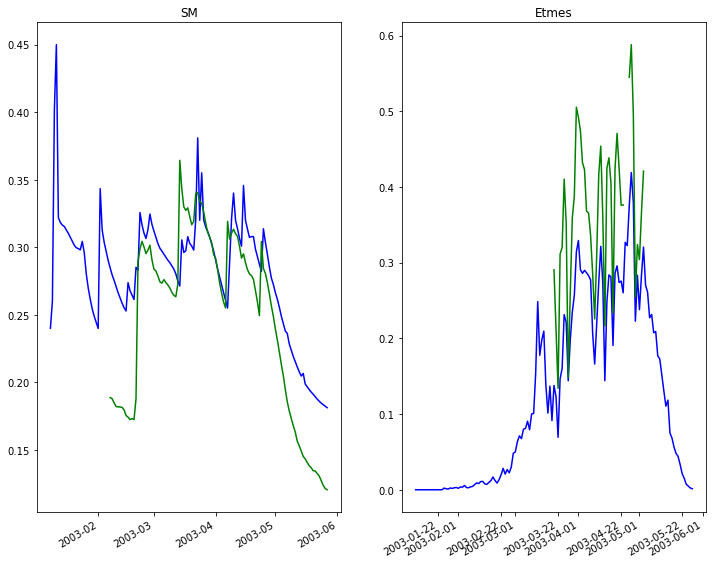

In [5]:
sortie_SM = pd.read_excel('/Users/mac/Soil Moisture Field C1_C2_C3.xlsx', sheet_name="F3-2002-2003_C2")

result_SM = sortie_SM.set_index("day")
                          
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,10))
for var, ax in zip(["SM", "TRA"], axes.flatten()):
    ax.plot_date(df_results.index, df_results[var], 'b-')
    ax.set_title(var)
for var, ax in zip(["SM", "Etmes"], axes.flatten()):
    ax.plot_date(result_SM.index, result_SM[var], 'g-')
    ax.set_title(var)
fig.autofmt_xdate()
